## Import important libraris 

In [110]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Problem Statement

# 2. Data Gatharing

In [111]:
dataset = pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [113]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [114]:
dataset.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [115]:
dataset.shape

(150, 6)

# 3. Exploratory Data Analysis (EDA)

In [116]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [118]:
dataset['Species'].nunique()

3

In [119]:
dataset["Species"].replace({"Iris-setosa": 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace=True)

In [120]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [121]:
dataset['Species'].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='SepalWidthCm'>

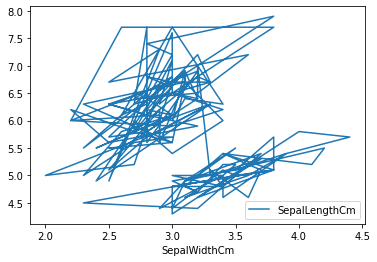

In [122]:
# here we can see there are number of linear regression lines are passing
dataset.plot(x="SepalWidthCm", y="SepalLengthCm")

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

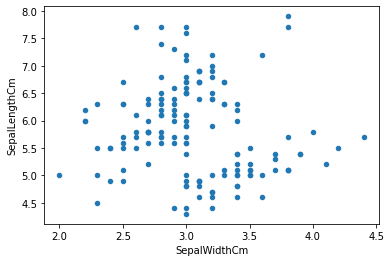

In [123]:
dataset.plot(x="SepalWidthCm", y="SepalLengthCm", kind="scatter")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

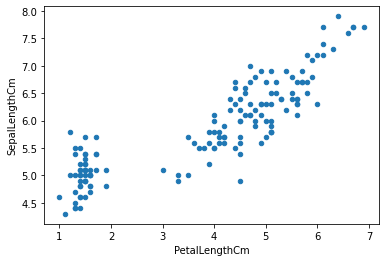

In [124]:
dataset.plot(x="PetalLengthCm", y="SepalLengthCm", kind="scatter")

<AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>

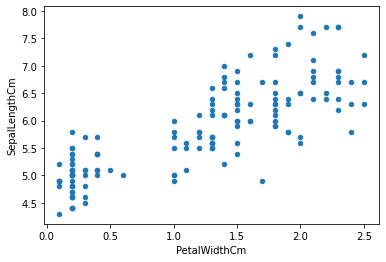

In [125]:
dataset.plot(x="PetalWidthCm", y="SepalLengthCm", kind="scatter")

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

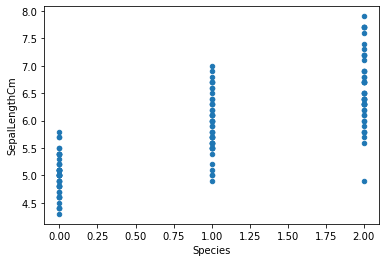

In [126]:
dataset.plot(x="Species", y="SepalLengthCm", kind="scatter")

### 1. Assumptions
#### 1. Linearity
    - The relationship between independent and dependent variables should be linear

In [127]:
### Plot all the graph simultaniously

<Figure size 2160x2160 with 0 Axes>

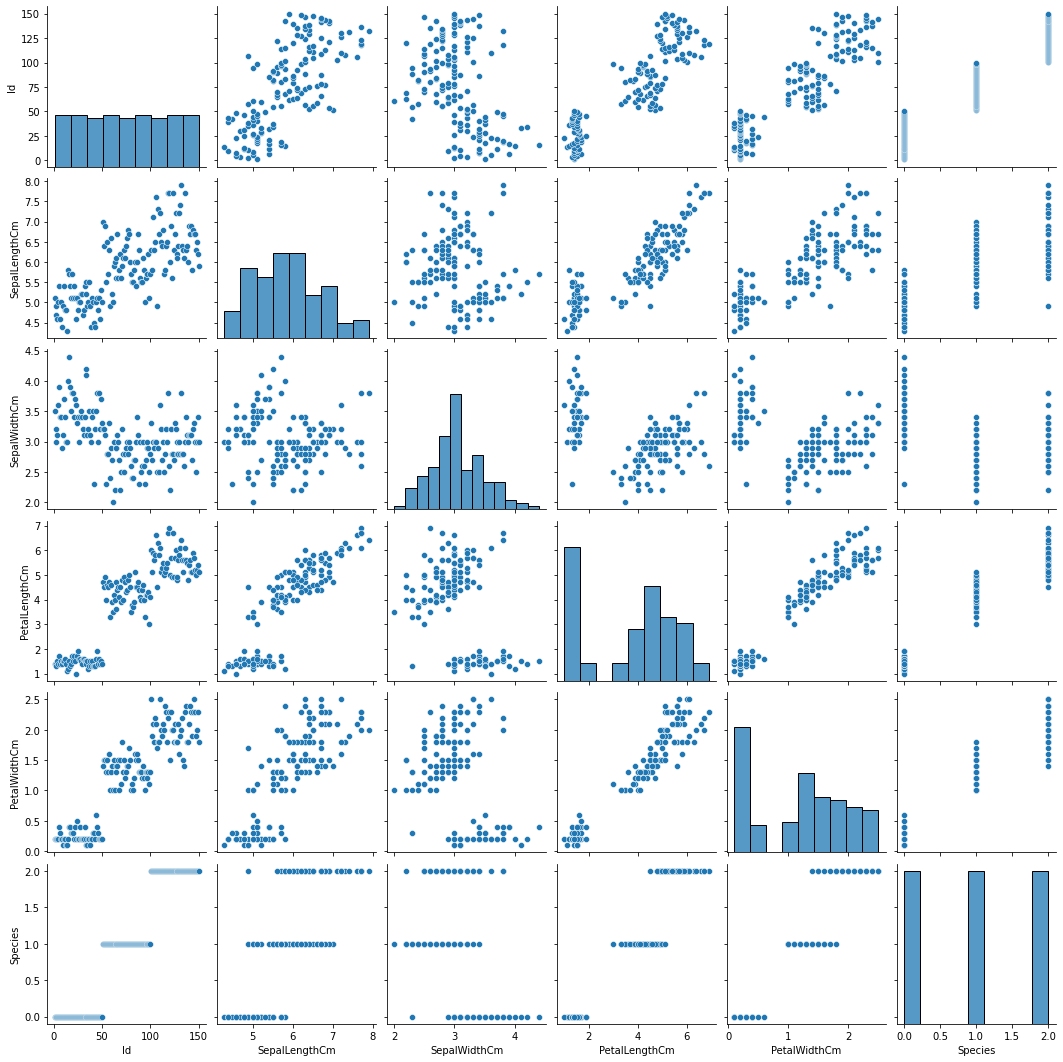

In [128]:

plt.figure(figsize=(30,30))
sns.pairplot(dataset, kind='scatter')

In [129]:
# Cofficient of corelation / Pearson coifficient of correlation
dataset.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [130]:
## Check the relationship with the target columns

<AxesSubplot:>

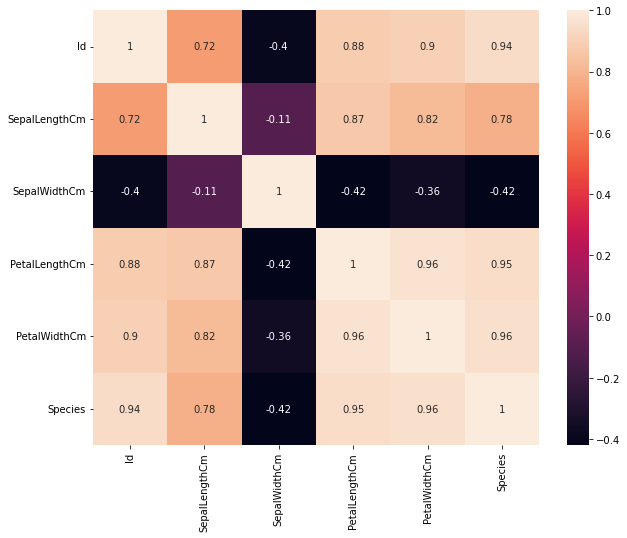

In [131]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True)

<AxesSubplot:>

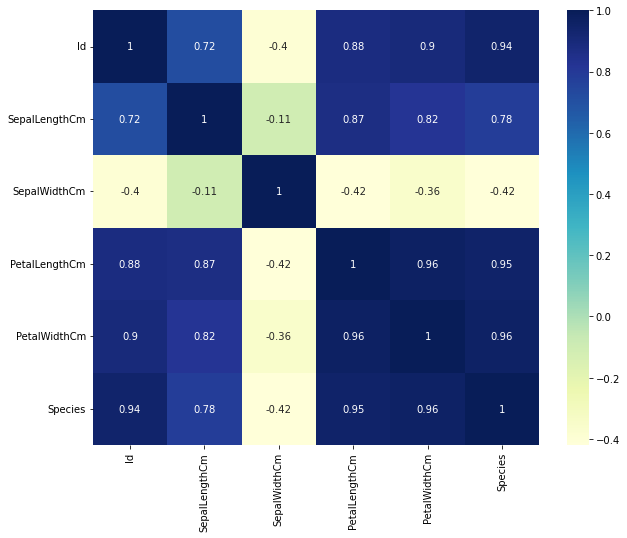

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")

# 4. Feature Engineering
- 1. Scaling
- 2. Binning
- 3. Outliers
- 4. Missing Values

# 5. Feature Selection
    - We keep thos feature which are having good corelation with output variables

In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [134]:
dataset.drop(labels="Id", axis=1, inplace=True)

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# 6. Model Training / Model Building

### 6.1 spliting the data

In [136]:
# dataset.head()

In [137]:
x = dataset.drop(labels="SepalLengthCm", axis=1)
y = dataset["SepalLengthCm"]

# OR

# x = dataset.iloc[:, 1:].values
# y = dataset.iloc[:, 0]

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [139]:
x_train

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,3.0,4.6,1.4,1
135,3.0,6.1,2.3,2
69,2.5,3.9,1.1,1
128,2.8,5.6,2.1,2
114,2.8,5.1,2.4,2
...,...,...,...,...
133,2.8,5.1,1.5,2
137,3.1,5.5,1.8,2
72,2.5,4.9,1.5,1
140,3.1,5.6,2.4,2


In [140]:
# 150 >> 120 (Training) + 30 (Testing)
x_train.shape

(120, 4)

## 6.2 Instatiating Linear Regression Model

In [141]:
model = LinearRegression()
model

LinearRegression()

## 6.3 Training a model

In [142]:
model.fit(x_train,y_train)

LinearRegression()

## 7. Evaluating Model

In [143]:
y_pred_test = model.predict(x_test)

# Predicted dependent variables
y_pred_test

array([5.09192877, 4.93149358, 6.25720518, 5.02467945, 7.72619147,
       6.58803407, 6.08751945, 5.47306316, 4.97011483, 6.65064945,
       5.96358461, 5.36185069, 6.79865775, 6.40915979, 6.23704035,
       4.7172364 , 5.78471033, 6.2944135 , 4.90639933, 4.63294359,
       6.12188157, 6.2944135 , 6.62170856, 4.84227135, 7.13895033,
       5.93666494, 5.37526068, 5.18297641, 6.48950629, 5.84732571])

In [144]:
# Actual dependent variables
y_test

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
56     6.3
141    6.9
44     5.1
29     4.7
120    6.9
94     5.6
5      5.4
102    7.1
51     6.4
78     6.0
42     4.4
92     5.8
66     5.6
31     5.4
35     5.0
90     5.5
84     5.4
77     6.7
40     5.0
125    7.2
99     5.7
33     5.5
19     5.1
73     6.1
146    6.3
Name: SepalLengthCm, dtype: float64

## Mean squared Error

In [145]:
MSE = mean_squared_error(y_pred_test, y_test)
print(f"Mean squared Error:- {MSE}")

Mean squared Error:- 0.15781531046414649


In [146]:
MSE = mean_squared_error(y_test, y_pred_test)
print(f"Mean squared Error:- {MSE}")

Mean squared Error:- 0.15781531046414649


## Mean Absolute Error

In [148]:
MAE = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error:- {MAE}")

Mean Absolute Error:- 0.3232781241570913


In [149]:
MAE = mean_absolute_error(y_pred_test, y_test)
print(f"Mean Absolute Error:- {MAE}")

Mean Absolute Error:- 0.3232781241570913


# r2_score

In [151]:
R2_score = r2_score(y_test, y_pred_test)
print(f"R2_score:- {R2_score}")

R2_score:- 0.7588110183264586


In [154]:
## Consider this way to calculate the R2_Score
R2_score = r2_score(y_pred_test, y_test)
print(f"R2_score:- {R2_score}")

R2_score:- 0.7375923796161155
